In [1]:
# We need to read our data from the excel sheets we acquired from the LCRA
# Import Pandas to do so
import pandas as pd
data = pd.read_csv('WCDATA.csv')
data.head() # Quick check to see the top of our data

,Date - Time,Count,Rainfall,Date - Time 2,Stage,Flow
0,10/21/17 14:30,12.36,0.0,10/21/17 14:30,1.03,1
1,10/21/17 14:15,12.36,0.0,10/21/17 14:15,1.03,1
2,10/21/17 14:00,12.36,0.0,10/21/17 14:00,1.02,1
3,10/21/17 13:45,12.36,0.0,10/21/17 13:45,1.06,1
4,10/21/17 13:30,12.36,0.0,10/21/17 13:30,1.06,1


In [2]:
# Visually represent the data in order to see any patterns or correlations
import seaborn as sns

# Allow plots to appear within the notebook
%matplotlib inline

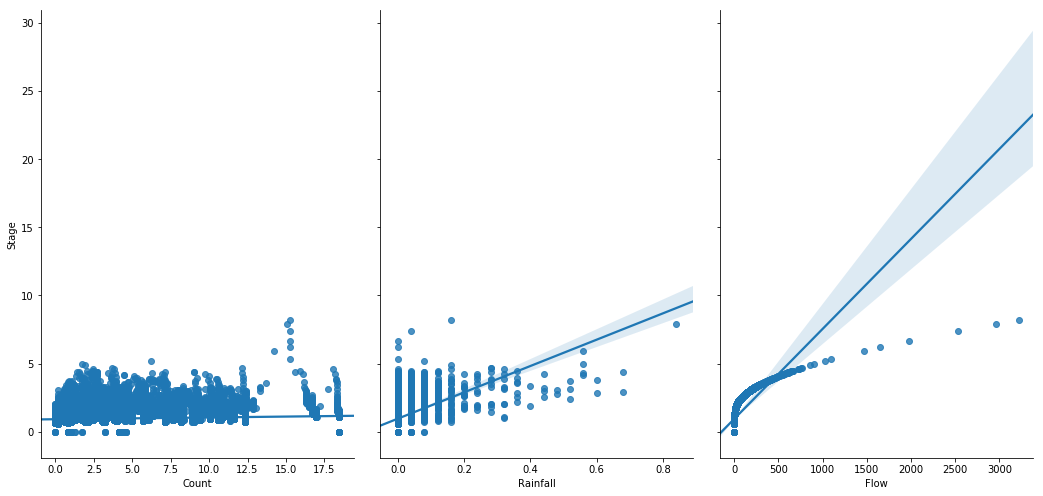

In [3]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars = ['Count', 'Rainfall', 'Flow'], y_vars = 'Stage', size = 7, aspect = 0.7, kind='reg')

In [4]:
# Visually, each variable/feature possesses little correlation (except Flow) with the stage
# Thus, we will need to use a model to see which variables are useful in our prediction algorithm
# Store our featuresin X
X = data[['Count', 'Rainfall', 'Flow']]
X.head() # Check our data to see if stored correctly

,Count,Rainfall,Flow
0,12.36,0.0,1
1,12.36,0.0,1
2,12.36,0.0,1
3,12.36,0.0,1
4,12.36,0.0,1


In [5]:
# Store results in y
y = data.Stage # This command is only possible if the y variable you want is a single word
y.head() # Check again

0    1.03
1    1.03
2    1.02
3    1.06
4    1.06
Name: Stage, dtype: float64

In [12]:
# Import the necessary packages needed to use K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [13]:
# Instantiate our linear regression model
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
scores = cross_val_score(linReg, X, y, cv = 10, scoring ='neg_mean_squared_error') # scoring=accuracy means we want to use classification accuracy as our unit
print scores

[-0.05791389 -0.04973458 -0.03605958 -0.07735632 -0.05416574 -0.13389763
 -0.3008058  -0.12547167 -0.09004801 -0.03182245]


In [14]:
# The scores are negative which does not help us so let's flip the sign
mse_scores = -scores
print mse_scores

[ 0.05791389  0.04973458  0.03605958  0.07735632  0.05416574  0.13389763
  0.3008058   0.12547167  0.09004801  0.03182245]


In [15]:
# Now we need to convert our mean squared error values to root squared mean error
rmse_scores = np.sqrt(mse_scores)
print rmse_scores

[ 0.24065305  0.22301252  0.18989361  0.27813005  0.23273534  0.36592025
  0.54845766  0.3542198   0.30008     0.17838847]


In [16]:
# Now we need the average of the RMSE of the 10 folds
print rmse_scores.mean()

0.291149074252


In [19]:
# What I learned that the K-fold cross validation does not actually train the algorithm
# However, it allows you to see how well your model would do if it was trained and tested with all possible data
# Therefore we can now train our linear regression model with all our data since we know the average RMSE
linReg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# Let's make a prediction of our own and see if our program gets close to the actual result
linReg.predict([[12.36, 0.0, 1]]) # You need to make a list inside a list since the predict method expects a 2D array

array([ 1.02752424])

In [ ]:
# The actual result of the values we inputed is 1.01 feet
# We were off by 1.02752424 - 1.01 = .01752424 feet which is a lot better than our cross test split method!